In [1]:
import sys 
sys.path.append('..')

from lya.data import get_data_transfer_function, plot_pk

data = get_data_transfer_function()

/Users/tmorton/miniconda3/envs/cosmolab/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['stix'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


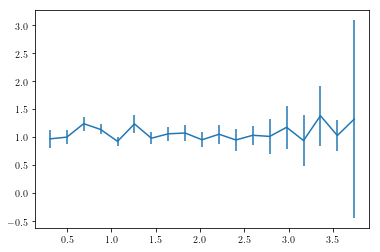

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.errorbar(data.x, data.y, data.y_unc);


In [3]:
from lya.analysis import objective

def log_prob(pars, data):
    # priors
    if pars[0] < 0 or pars[0] > 0.5:
        return -np.inf
    
    if pars[1] < 0 or pars[1] > 10:
        return -np.inf
    
    if pars[2] < -10 or pars[2] > 0:
        return -np.inf
    
    lnp = -0.5 * objective(pars, data)
    if np.isnan(lnp):
        lnp = -np.inf
    return lnp

In [4]:
import numpy as np

ndim = 3
nwalkers = 64

p0_fiducial = [0.03, 5, -5]
p0 = p0_fiducial + np.random.rand(nwalkers, ndim)*0.1  # initial guess for each of the walkers

In [5]:
np.isfinite([log_prob(p, data) for p in p0]).all()

True

In [6]:
import emcee

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[data])

state = sampler.run_mcmc(p0, 300)
sampler.reset()

In [7]:
sampler.run_mcmc(state, 1000);

In [8]:
samples = sampler.get_chain(flat=True)

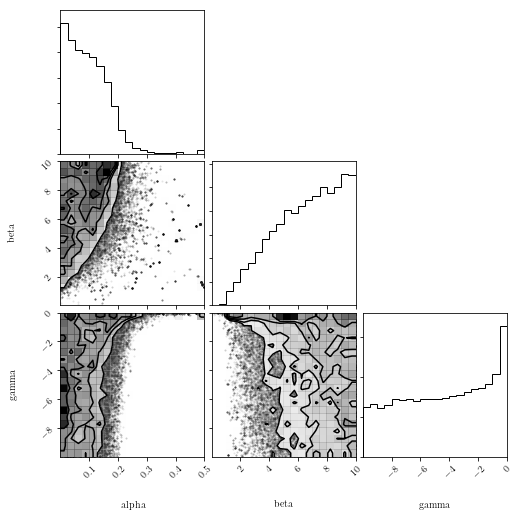

In [9]:
from corner import corner

corner(samples, labels=['alpha', 'beta', 'gamma']);

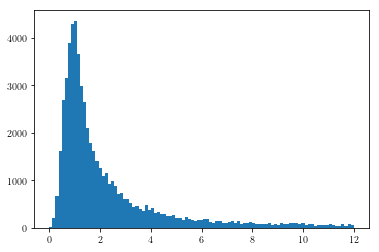

In [10]:
# compare to Fig 4 of Murgia+ (2018)
plt.hist(np.abs(samples[:, 1] / samples[:, 2]), bins=np.linspace(0, 12, 100));